In [1]:
import pandas as pd

In [22]:
df=pd.read_csv('train.csv')

In [23]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [25]:
X=df.drop('label',axis=1)
y=df['label']

In [26]:
df=df.dropna()

In [50]:
messages=df.copy()
messages.reset_index(inplace=True)

In [51]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [33]:
# find fake news besed on title 


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [36]:
corpus[1:10]

['flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [57]:
x.shape

(18285, 6000)

In [60]:
y=messages['label']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
cv.get_feature_names()[:15]

['aaron',
 'ab',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'aboard',
 'abort',
 'abroad',
 'absolut',
 'abstain']

In [64]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [65]:
new_df=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [66]:
new_df

,aaron,ab,abandon,abba,abc,abc news,abduct,abe,abedin,abl,...,zika new,zika new york,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [68]:
from sklearn import metrics
import numpy as np
import itertools

In [69]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.902
Confusion matrix, without normalization


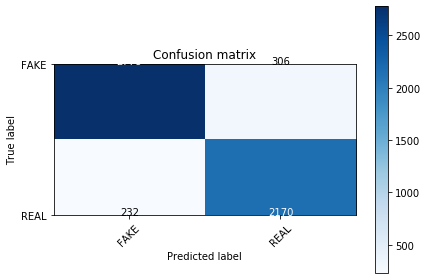

In [72]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Multinomial Classifier with Hyperparameter

In [76]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8853445133065986
Alpha: 0.1, Score : 0.9017499088589136
Alpha: 0.2, Score : 0.9026613197229311
Alpha: 0.30000000000000004, Score : 0.9017499088589136
Alpha: 0.4, Score : 0.9013853445133067
Alpha: 0.5, Score : 0.9017499088589136
Alpha: 0.6000000000000001, Score : 0.9021144732045207
Alpha: 0.7000000000000001, Score : 0.9015676266861101
Alpha: 0.8, Score : 0.9021144732045207
Alpha: 0.9, Score : 0.9021144732045207


In [80]:
classifier.coef_

array([[-10.88481668,  -9.19022096,  -9.19022096, ..., -10.88481668,
         -8.84793475,  -9.41847961]])

In [82]:
feature_names=cv.get_feature_names()
sorted(zip(classifier.coef_[0], feature_names), reverse=False)[:20]

[(-10.884816680589505, 'aaron'),
 (-10.884816680589505, 'abe'),
 (-10.884816680589505, 'aboard'),
 (-10.884816680589505, 'abroad'),
 (-10.884816680589505, 'abus new'),
 (-10.884816680589505, 'abus new york'),
 (-10.884816680589505, 'acosta'),
 (-10.884816680589505, 'act new'),
 (-10.884816680589505, 'act new york'),
 (-10.884816680589505, 'advic'),
 (-10.884816680589505, 'advis new'),
 (-10.884816680589505, 'advis new york'),
 (-10.884816680589505, 'afford care'),
 (-10.884816680589505, 'afford care act'),
 (-10.884816680589505, 'age new'),
 (-10.884816680589505, 'age new york'),
 (-10.884816680589505, 'agenda breitbart'),
 (-10.884816680589505, 'ahca'),
 (-10.884816680589505, 'ahmad'),
 (-10.884816680589505, 'ail')]